# Blob 101

Welcome back! This notebook will go over blobs, their various attributes, and how to make your own blob classes

In [3]:
import sys
sys.path.append('..')
from environment import *
from blobs import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


To start with, all blobs inherit from the `BaseBlob` class. Let's call an instance of this class and see what attributes and properties it has

In [7]:
b = BaseBlob(1.0, 1.0, 1.0)
print([d for d in dir(b) if not d[0].startswith('_')])

['color', 'move', 'mutated_offspring_traits', 'mutation_class', 'mutation_prob', 'name', 'repr_class', 'reproduce', 'reproduction_prob', 'size', 'step', 'survival_prob', 'x', 'y']


We have quite the few attributes and methods available to us. Let's access the docstrings to learn more

In [10]:
?BaseBlob

Init signature: BaseBlob(survival_prob, reproduction_prob, mutation_prob) -> None
Docstring:     
Base class for blob. Each blob class should functionally contain at a
minimum a reproduce method and a move method

Attributes:
    name (str): name associated with blob type
    survival_prob (float): probability of survival at each epoch
    reproduction_prob (float): probability of reproduction at each epoch
    mutation_prob (float): probability of mutation at each epoch

    mutation_class (Callable): class to mutate to
    repr_class (Callable) class to produce when reproducing w/o mutation
    mutated_offspring_traits (tuple): traits used to init mutated offspring
    color (str): color of Blob for display
    x (float): x-coordinate of Blob
    y (float): y-coordinate of Blob
    size (float): effective size of blob
    step (float): increment at which blob moves across environment
Init docstring:
Inits BaseBlob

Args:
    survival_prob (float): probability of survival at each epoc

This tells us quite a lot. For starters, it looks like the relevant attributes are listed under the `Attributes` section. This will be different for the more complex blobs and will likely grow or change as `pyevo` evolves (get it?) but accessing the docstrings will always provide the most up to date understanding

Let's focus on a couple of the important ones. We've already gone through the three attributes required to __init__ a blob, namely `survival_prob`, `reproduction_prob`, and `mutation_prob`. 

Some general ones that will likely be used across all blobs and environments are:
1. `name`. This is the name of the blob class. As we saw in notebook 1 however, this can also be used to keep track of a specific blob or blobs.
2. `color`. This is the color of the blob as displayed in the semi-interactive plots available through the `Environment` classes

Some other important ones for reproduction are:
1. `mutation_class`. This is the class object that the blob will mutate into. For now, `pyevo` supports single mutation linkages but this will change in the future.
2. `repr_class`. This tells `pyevo` what the class will reproduce to if given the chance to reproduce. For most cases, this will just be the same as the class itself.
3. `mutated_offspring_traits`. This is the set of three values used to init the mutated offspring

This doesn't cover all that are available! As mentioned before, as `pyevo` continues to evolve, these attributes will likely continue to change. To stay up to date, read the docstrings via the `?<BlobClass>` call!

## Making our own classes

While `pyevo` has many base classes defined, for many purposes it'll be valuable to create custom classes. Let's go through a case of this together. Say we want to setup a simulation to study how varying `survival_prob` and `reproduction_prob` affect overall population survival.

First, let's define a class called `Bunny` that inherits from `BaseBlob`

In [17]:
class Bunny(BaseBlob):
    """Nibble nibble"""
    def __init__(self):
        super().__init__()

Now that our `Bunny` class has inherited from `BaseBlob`, let's set some of its attributes

In [24]:
class Bunny(BaseBlob):
    """Nibble nibble"""
    def __init__(self, survival_prob, reproduction_prob, mutation_prob):
        super().__init__(survival_prob, reproduction_prob, mutation_prob)
        self.name = 'Bunny'
        self.color = 'pink'
        self.repr_class = Bunny #when bunnies reproduce, they form more bunnies

The typical attributes of bunnies are that they have relatively short lifespans and reproduce <b>a lot</b>. Let's reflect this in the init call

In [41]:
bun = Bunny(0.3, 0.9, 0.0)
str(bun), bun.name

('Bunny(0.3, 0.9, 0.0)', 'Bunny')

That's it! Now we have a real live (abstraction of) a Bunny!

This is a very simplified example, but let's make a couple more classes. For this simulation, these classes will all be along the same lines of simplicity but later on we'll introduce more intricately designed classes

In [34]:
class Elephant(BaseBlob):
    """*trumpet sound*"""
    def __init__(self, survival_prob, reproduction_prob, mutation_prob):
        super().__init__(survival_prob, reproduction_prob, mutation_prob)
        self.name = 'Elephant'
        self.color = 'brown'
        self.repr_class = Elephant
        
class Bacteria(BaseBlob):
    """*silence*"""
    def __init__(self, survival_prob, reproduction_prob, mutation_prob):
        super().__init__(survival_prob, reproduction_prob, mutation_prob)
        self.name = 'Bacteria'
        self.color = 'green' #Not a political statement, just choosing a random color
        self.repr_class = Bacteria
        
class Human(BaseBlob):
    """'I am the most important being in the universe'"""
    def __init__(self, survival_prob, reproduction_prob, mutation_prob):
        super().__init__(survival_prob, reproduction_prob, mutation_prob)
        self.name = 'Human'
        self.color = 'blue' #Not a political statement, just choosing a random color
        self.repr_class = Human

Now that we have our classes, let's instantiate them with the main attributes and send them off to interact!

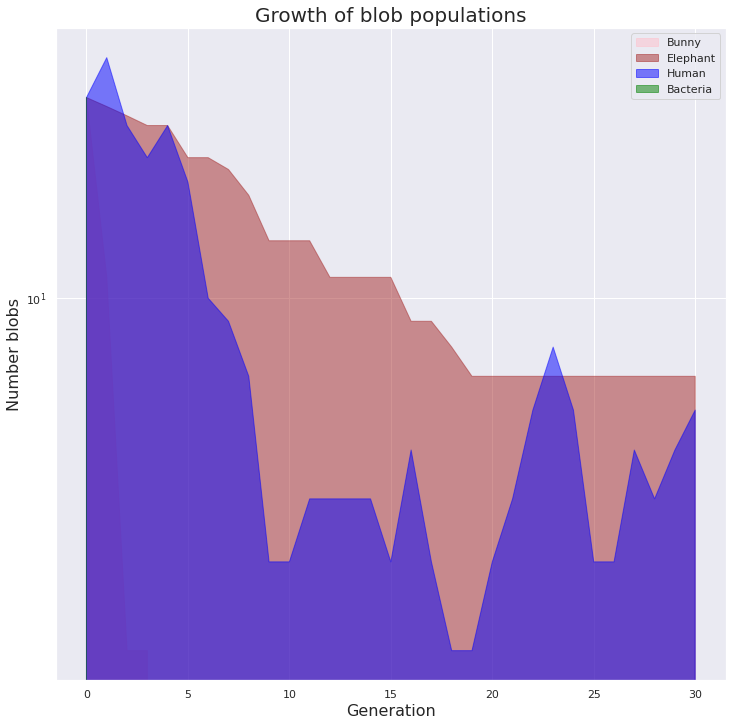

In [39]:
bunnies = [Bunny(0.2, 0.95, 0.0) for x in range(25)]
elephants = [Elephant(0.95, 0.05, 0.0) for x in range(25)]
bacteria = [Bacteria(0.1, 0.999, 0.0) for x in range(25)]
humans = [Human(0.7, 0.4, 0.0) for x in range(25)]

e = BaseEnvironment()
e.spawn_population(bunnies + elephants + bacteria + humans)

for i in range(30):
    e.interact()
    
e.plot_growth()

Somewhat depressingly, in most simulations all of the blobs don't face such good prospects. It does seem that of all the reproductive strategies, that of the `Bunny` seems relatively succesful - reproducing a lot even when any individual `Bunny` may not survive too long seems to work out pretty well

This wraps up our introduction to blobs! One thing not mentioned in this notebook are the methods associated with different blobs. For the ambitious learner, feel free to dive into the docstrings and see what you can find!